# Covid-19 in Big Ten Conference Colleges

Track 2: Data Science (Modeling)

Team 244

In [ ]:
import numpy as np 
import pandas as pd 
import io 
import requests

The first three open source datasets are about College COVID-19 dataset for Big Ten Conference School.

The forth dataset are provided by NYTimes with daily confirmed cases by county.

The last data source named by 'uni' was a dataset created by ourselves contains information about:

+ Country_Region - big ten conference school name
+ county
+ state
+ enroll_16 - total student enrollment for fall 2016
+ enroll_17
+ enroll_18
+ enroll_19
+ enroll_20
+ international_18 - total international students for fall 2018
+ international_19
+ international_20
+ stimulus_funding - stimulus funding provide by the government for big ten

In [ ]:
college="https://raw.githubusercontent.com/nytimes/covid-19-data/master/colleges/colleges.csv"
college=pd.read_csv(college, encoding= 'unicode_escape',delimiter = ",")
bigten="https://raw.githubusercontent.com/wadefagen/college-covid19-dataset/master/data/daily.csv"
bigten=pd.read_csv(bigten, encoding= 'unicode_escape',delimiter = ",")
uiuc = 'https://raw.githubusercontent.com/wadefagen/college-covid19-dataset/master/data/detailed/uiuc.csv'
uiuc=pd.read_csv(uiuc, encoding= 'unicode_escape',delimiter = ",")
county = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
county=pd.read_csv(county, encoding= 'unicode_escape',delimiter = ",")
uni = 'https://raw.githubusercontent.com/Yinsight/StanfordOpenDatathon_Team244/main/college-region.csv'
uni = pd.read_csv(uni,encoding='unicode_escape',delimiter = ',')

In [ ]:
# clean the dataset
# split the date into year, month, date
# turn the month from a string to number
uiuc[['year','month','Date']] = uiuc['Date'].str.split('-', expand = True)
uiuc['month'] = pd.to_numeric(uiuc['month'])
county[['year','month','date']] = county['date'].str.split('-', expand = True)
county['month'] = pd.to_numeric(county['month'])
bigten[['year','month','Date']] = bigten['Date'].str.split('-', expand = True)
bigten['month'] = pd.to_numeric(bigten['month'])
uni.columns.values[0] = 'Country_Region'

## 1. Sort covid 19 dataset for bigten

### 1.1 Tested number for each school by month

The orginal dataset provides the cumulative numbers for each school.

In [ ]:
bigten['month'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
bigten[bigten['month'] <= 7].groupby(['Country_Region','month'])['Tests'].max().reset_index()

,Country_Region,month,Tests
0,Illinois,7,13243.0
1,Michigan,3,815.0
2,Michigan,4,1367.0
3,Michigan,5,2429.0
4,Michigan,6,4221.0
5,Michigan,7,7165.0
6,Northwestern,3,NaN
7,Northwestern,4,NaN
8,Northwestern,5,NaN
9,Northwestern,6,NaN


In [ ]:
bigten[bigten['month'] == 8].groupby('Country_Region')[['Tests','Confirmed']].max().reset_index()

,Country_Region,Tests,Confirmed
0,Illinois,182060.0,1106
1,Indiana,21352.0,1441
2,Iowa,NaN,935
3,Maryland,11962.0,28
4,Michigan,14556.0,370
5,Michigan State,1758.0,573
6,Minnesota,2694.0,124
7,Nebraska,1613.0,243
8,Northwestern,NaN,73
9,Ohio State,29384.0,847


We could see that most of the school does not have information before August, so decide to collect the information starting from August (July is also included for later on purpose).

In [ ]:
ten = bigten['Country_Region'].unique()
ten = pd.DataFrame(ten, columns=['Country_Region'])

In [ ]:
ten = pd.merge(ten, bigten[bigten['month'] == 7].groupby('Country_Region')['Tests'].max().reset_index(name = 'test_7'), how='left',on='Country_Region')
ten = pd.merge(ten, bigten[bigten['month'] == 8].groupby('Country_Region')['Tests'].max().reset_index(name = 'test_8'), how='left',on='Country_Region')
ten = pd.merge(ten, bigten[bigten['month'] == 9].groupby('Country_Region')['Tests'].max().reset_index(name = 'test_9'), how='left',on='Country_Region')
ten = pd.merge(ten, bigten[bigten['month'] == 10].groupby('Country_Region')['Tests'].max().reset_index(name = 'test_10'), how='left',on='Country_Region')
ten = pd.merge(ten, bigten[bigten['month'] == 11].groupby('Country_Region')['Tests'].max().reset_index(name = 'test_11'), how='left',on='Country_Region')
ten = pd.merge(ten, bigten[bigten['month'] == 12].groupby('Country_Region')['Tests'].max().reset_index(name = 'test_12'), how='left',on='Country_Region')
ten

,Country_Region,test_7,test_8,test_9,test_10,test_11,test_12
0,Michigan,7165.0,14556.0,27730.0,51107.0,87499.0,100103.0
1,Northwestern,NaN,NaN,21626.0,43767.0,69428.0,73676.0
2,Rutgers,9776.0,22117.0,34947.0,51017.0,73028.0,76703.0
3,Illinois,13243.0,182060.0,444197.0,693380.0,917499.0,1025454.0
4,Purdue,NaN,7605.0,31844.0,57735.0,83386.0,86991.0
5,Michigan State,NaN,1758.0,4879.0,6672.0,12067.0,13453.0
6,UW-Madison,NaN,9711.0,46325.0,87046.0,131126.0,152177.0
7,Indiana,NaN,21352.0,67428.0,115024.0,152841.0,165201.0
8,Maryland,NaN,11962.0,31281.0,45262.0,59146.0,71746.0
9,Nebraska,NaN,1613.0,5767.0,11629.0,19001.0,21198.0


We could see that Iowa's testing record is not included in this dataset.

In order to see the universities dedication in testing, we would like to find the newly tested for each month.

In [ ]:
ten_test = ten
test_diff = pd.DataFrame(ten_test.iloc[:,0])
ten_test=ten_test.fillna(0)
test_diff = pd.concat([test_diff,ten_test.iloc[:,1:].diff(axis = 1).iloc[:,1:6]], axis = 1)
test_diff

,Country_Region,test_8,test_9,test_10,test_11,test_12
0,Michigan,7391.0,13174.0,23377.0,36392.0,12604.0
1,Northwestern,0.0,21626.0,22141.0,25661.0,4248.0
2,Rutgers,12341.0,12830.0,16070.0,22011.0,3675.0
3,Illinois,168817.0,262137.0,249183.0,224119.0,107955.0
4,Purdue,7605.0,24239.0,25891.0,25651.0,3605.0
5,Michigan State,1758.0,3121.0,1793.0,5395.0,1386.0
6,UW-Madison,9711.0,36614.0,40721.0,44080.0,21051.0
7,Indiana,21352.0,46076.0,47596.0,37817.0,12360.0
8,Maryland,11962.0,19319.0,13981.0,13884.0,12600.0
9,Nebraska,1613.0,4154.0,5862.0,7372.0,2197.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# prepare for plotting
test_diff_plot  = test_diff.iloc[0:13,:].T
new_header = test_diff_plot.iloc[0]
test_diff_plot = test_diff_plot[1:]
test_diff_plot.columns = new_header
test_diff_plot = test_diff_plot.rename(index={"test_8": "August", "test_9": "September", "test_10": "October", "test_11": "November", "test_12": "December"})
test_diff_plot = test_diff_plot.astype(float)

In [ ]:
colors = ['#7e1e9c','#95d0fc','#06c2ac','#06470c','#ff796c','#ffff14','#0504aa','#e50000','#653700','#cea2fd','#ae7181','#ceb301','#ffd1df','#3f9b0b']

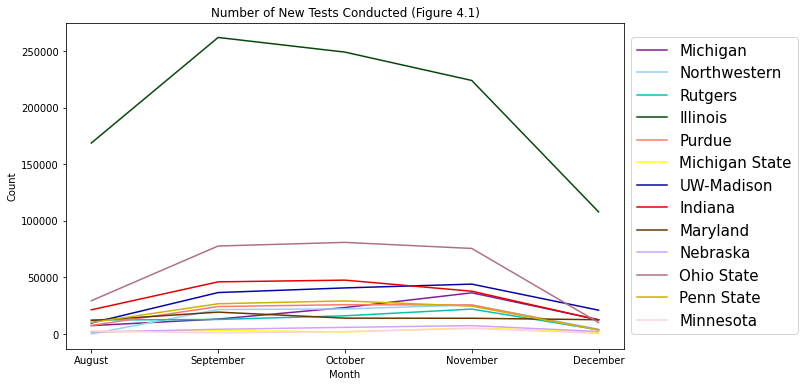

In [ ]:
plt.figure(figsize=(10,6))
sns.set_palette(sns.color_palette(colors))
# colors = sns.color_palette('Paired',13)
ax = sns.lineplot(data = test_diff_plot,  dashes=False, sort = False).set(title='Number of New Tests Conducted (Figure 4.1)', xlabel='Month', ylabel='Count')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

### 1.2 Confirmed  number for each school by month

For the same reason above, we would like to take the confirm number for each school since July 2020.

In [ ]:
ten = pd.merge(ten, bigten[bigten['month'] == 7].groupby('Country_Region')['Confirmed'].max().reset_index(name = 'confirmed_7'), how='left',on='Country_Region')
ten = pd.merge(ten, bigten[bigten['month'] == 8].groupby('Country_Region')['Confirmed'].max().reset_index(name = 'confirmed_8'), how='left',on='Country_Region')
ten = pd.merge(ten, bigten[bigten['month'] == 9].groupby('Country_Region')['Confirmed'].max().reset_index(name = 'confirmed_9'), how='left',on='Country_Region')
ten = pd.merge(ten, bigten[bigten['month'] == 10].groupby('Country_Region')['Confirmed'].max().reset_index(name = 'confirmed_10'), how='left',on='Country_Region')
ten = pd.merge(ten, bigten[bigten['month'] == 11].groupby('Country_Region')['Confirmed'].max().reset_index(name = 'confirmed_11'), how='left',on='Country_Region')
ten = pd.merge(ten, bigten[bigten['month'] == 12].groupby('Country_Region')['Confirmed'].max().reset_index(name = 'confirmed_12'), how='left',on='Country_Region')

In [ ]:
ten_confirmed = ten.iloc[:,[0,7,8,9,10,11,12]]
ten_confirmed=ten_confirmed.fillna(0)
ten_confirmed['confirmed_7'] = ten_confirmed['confirmed_7'].astype('int64')
ten_confirmed

,Country_Region,confirmed_7,confirmed_8,confirmed_9,confirmed_10,confirmed_11,confirmed_12
0,Michigan,252,370,987,2118,3047,3233
1,Northwestern,49,73,145,255,480,511
2,Rutgers,81,102,295,418,816,882
3,Illinois,57,1106,2511,3138,4190,4526
4,Purdue,0,174,924,1763,3358,3619
5,Michigan State,0,573,2110,2461,3567,3710
6,UW-Madison,0,124,2069,2586,3684,3891
7,Indiana,0,1441,2665,3297,4286,4451
8,Maryland,0,28,327,530,723,886
9,Nebraska,0,243,799,1174,1815,2012


Next we would like to calculate the newly confirmed case for each month and plot it to see the trend for each university.

In [ ]:
confrimed_diff = pd.DataFrame(ten_confirmed.iloc[:,0])
confrimed_diff = pd.concat([confrimed_diff,ten_confirmed.iloc[:,1:].diff(axis = 1).iloc[:,1:6]], axis = 1)
confrimed_diff

,Country_Region,confirmed_8,confirmed_9,confirmed_10,confirmed_11,confirmed_12
0,Michigan,118.0,617.0,1131.0,929.0,186.0
1,Northwestern,24.0,72.0,110.0,225.0,31.0
2,Rutgers,21.0,193.0,123.0,398.0,66.0
3,Illinois,1049.0,1405.0,627.0,1052.0,336.0
4,Purdue,174.0,750.0,839.0,1595.0,261.0
5,Michigan State,573.0,1537.0,351.0,1106.0,143.0
6,UW-Madison,124.0,1945.0,517.0,1098.0,207.0
7,Indiana,1441.0,1224.0,632.0,989.0,165.0
8,Maryland,28.0,299.0,203.0,193.0,163.0
9,Nebraska,243.0,556.0,375.0,641.0,197.0


In [ ]:
# prepare for plot
confrimed_diff_plot  = confrimed_diff.T
new_header = confrimed_diff_plot.iloc[0]
confrimed_diff_plot = confrimed_diff_plot[1:]
confrimed_diff_plot.columns = new_header
confrimed_diff_plot = confrimed_diff_plot.rename(index={"confirmed_8": "August", "confirmed_9": "September", "confirmed_10": "October", "confirmed_11": "November", "confirmed_12": "December"})
confrimed_diff_plot= confrimed_diff_plot.astype(float)

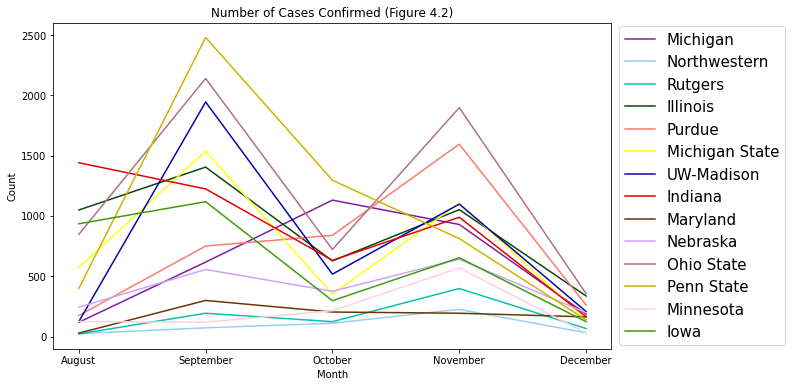

In [ ]:
plt.figure(figsize=(10,6))
sns.set_palette(sns.color_palette(colors))
ax = sns.lineplot(data=confrimed_diff_plot, dashes=False, sort = False).set(title='Number of Cases Confirmed (Figure 4.2)', xlabel='Month', ylabel='Count')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

### 1.3 Confirmed/Test Percentage

Since the confirm case would depend on the test case, we could like to see the percentage of the how many tested are confirmed.

In [ ]:
confrimed_percentage = pd.DataFrame(confrimed_diff.iloc[:,0])
confrimed_for_per = pd.DataFrame(confrimed_diff.iloc[:,1:])
confrimed_for_per.columns = ['confimed/test_8',"confimed/test_9","confimed/test_10","confimed/test_11","confimed/test_12"]
test_for_per = pd.DataFrame(test_diff.iloc[:,1:])
test_for_per.columns = ['confimed/test_8',"confimed/test_9","confimed/test_10","confimed/test_11","confimed/test_12"]
confrimed_percentage = confrimed_for_per.div(test_for_per)*100
confrimed_percentage = confrimed_percentage.replace(np.inf,0)
bigten_name = confrimed_diff['Country_Region'].tolist()
confrimed_percentage.insert(0,'Country_Region',bigten_name)
confrimed_percentage

,Country_Region,confimed/test_8,confimed/test_9,confimed/test_10,confimed/test_11,confimed/test_12
0,Michigan,1.596536,4.683467,4.838089,2.552759,1.475722
1,Northwestern,0.000000,0.332933,0.496816,0.876817,0.729755
2,Rutgers,0.170164,1.504287,0.765401,1.808187,1.795918
3,Illinois,0.621383,0.535979,0.251622,0.469393,0.311241
4,Purdue,2.287968,3.094187,3.240508,6.218081,7.239945
5,Michigan State,32.593857,49.247036,19.576129,20.500463,10.317460
6,UW-Madison,1.276902,5.312176,1.269615,2.490926,0.983326
7,Indiana,6.748782,2.656481,1.327843,2.615226,1.334951
8,Maryland,0.234075,1.547699,1.451971,1.390089,1.293651
9,Nebraska,15.065096,13.384689,6.397134,8.695062,8.966773


Since the testing data are not provided by Iowa, therefore it shows are 0% for each month. 

For better clarification, we will plot this percentage.(Iowa will not included in the plot to avoid confusion.)

In [ ]:
# preparation for plot
confrimed_percentage_no_iowa = confrimed_percentage.iloc[0:13,:]
confrimed_percentage_plot  = confrimed_percentage_no_iowa.T
new_header = confrimed_percentage_plot.iloc[0]
confrimed_percentage_plot = confrimed_percentage_plot[1:]
confrimed_percentage_plot.columns = new_header
confrimed_percentage_plot = confrimed_percentage_plot.rename(index={"confimed/test_8": "August", "confimed/test_9": "September", "confimed/test_10": "October", "confimed/test_11": "November", "confimed/test_12": "December"})
confrimed_percentage_plot= confrimed_percentage_plot.astype(float)


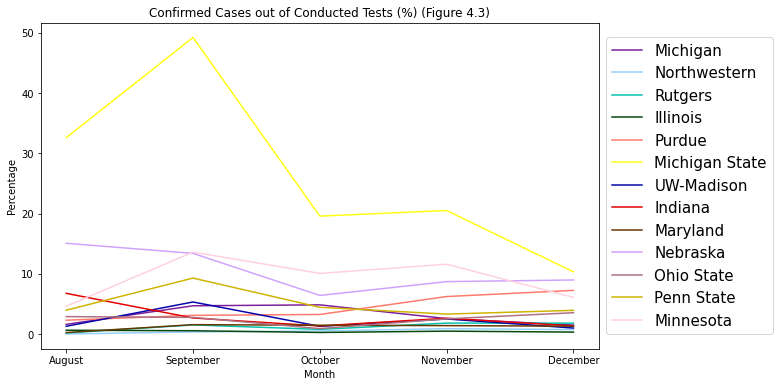

In [ ]:
plt.figure(figsize=(10,6))
sns.set_palette(sns.color_palette(colors))
ax = sns.lineplot(data=confrimed_percentage_plot.iloc[:,0:13], dashes=False,sort = False).set(title='Confirmed Cases out of Conducted Tests (%) (Figure 4.3)', xlabel='Month', ylabel='Percentage')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

## 2 Compare university situation with county

### 2.1. Consider covid data for county

In this section, we will use the county covid data provided by NYTimes to evaluate how the college performs comaring with its County and any influence between them.

For those univerisities that have multiple campuses, we:
+ first, reference the university dashboard's to see whether the data provided by them only includes the main campus
  + We then select all the counties for those multiple campuses and compare their total cases with universities' confirmed
+ second, reference the NYTimes for defining the county for univerisities' counties since the county data are provided by them.


Universities with potential multi-campus issues:
+ __University of Michigan (Michigan)__ - it has been stated on the website of the dashboard that only Ann Arbor campus data is included
+ __Rugters University (Rugters)__ - its campuses locate in Middlesex, Camden and Essex. All __3 counties__ are considered
+ __University of Illinois Urbana-Champaign (Illinois)__ - it has been stated on the website of the dashboard that only Urbana-Champaign campus data is included
+ __Purdue University (Purdue)__ - All __3 counties__ - Tippecanoe, Allen, Lake - where its campuses are were considered
+ __Indiana University (Indiana)__ : We consider all the __8 counties__ in which every of its campus locates.
+ __University of Maryland (Maryland)__: Baltimore and Prince George's (__2 counties__) are considered for all its campuses.
+ __Pennsylvania State University (Penn State)__: All __21 counties__ includes all its campuses are included.
+ __University of Minnesota (Minnesota)__: it has been stated on the dashboard that only Two-Twins is included.



In [ ]:
county['date'] = county['date'].astype('int64')

In [ ]:
county_case = pd.DataFrame(uni.iloc[:,0:3])
county_case = pd.merge(county_case, county[county['month'] == 7].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_7'), how = 'left', on = ['county','state'])
county_case = pd.merge(county_case, county[county['month'] == 8].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_8'), how = 'left', on = ['county','state'])
county_case = pd.merge(county_case, county[county['month'] == 9].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_9'), how = 'left', on = ['county','state'])
county_case = pd.merge(county_case, county[county['month'] == 10].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_10'), how = 'left', on = ['county','state'])
county_case = pd.merge(county_case, county[county['month'] == 11].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_11'), how = 'left', on = ['county','state'])
county_case = pd.merge(county_case, county[(county['month'] == 12) & (county['date'] == 20)].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_12'), how = 'left', on = ['county','state'])

Indiana 

In [ ]:
indiana = {'state':['Indiana','Indiana','Indiana','Indiana','Indiana','Indiana','Pennsylvania','Indiana'], 'county':['Monroe','Wayne','Howard','Lake','St. Joseph','Floyd','Indiana','Marion']}
indiana = pd.DataFrame(data  = indiana)
indiana = pd.merge(indiana, county[county['month'] == 7].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_7'), how = 'left', on = ['county','state'])
indiana = pd.merge(indiana, county[county['month'] == 8].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_8'), how = 'left', on = ['county','state'])
indiana = pd.merge(indiana, county[county['month'] == 9].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_9'), how = 'left', on = ['county','state'])
indiana = pd.merge(indiana, county[county['month'] == 10].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_10'), how = 'left', on = ['county','state'])
indiana = pd.merge(indiana, county[county['month'] == 11].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_11'), how = 'left', on = ['county','state'])
indiana = pd.merge(indiana, county[(county['month'] == 12) & (county['date'] == 20)].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_12'), how = 'left', on = ['county','state'])
indiana

,state,county,confirmed_7,confirmed_8,confirmed_9,confirmed_10,confirmed_11,confirmed_12
0,Indiana,Monroe,665,1155,2713,3548,5729,7467
1,Indiana,Wayne,579,887,1145,2100,3854,5178
2,Indiana,Howard,793,1087,1349,1819,3838,5972
3,Indiana,Lake,6977,9203,10834,15786,29244,37105
4,Indiana,St. Joseph,3026,5168,6782,10491,17834,22867
5,Indiana,Floyd,661,1082,1426,2016,3388,4596
6,Pennsylvania,Indiana,256,427,737,1197,2564,3655
7,Indiana,Marion,14575,18631,21843,27627,46309,64119


In [ ]:
indiana = indiana.sum(axis = 0).tolist()
indiana[0] = 'Indiana'
indiana[1] = 'Indiana'
indiana.insert(0,'Indiana')
county_case.iloc[7,:] = indiana

Rugters

In [ ]:
Rutgers = {'state':['New Jersey','New Jersey','New Jersey'], 'county':['Middlesex','Camden','Essex']}
Rutgers = pd.DataFrame(data  = Rutgers)
Rutgers = pd.merge(Rutgers, county[county['month'] == 7].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_7'), how = 'left', on = ['county','state'])
Rutgers = pd.merge(Rutgers, county[county['month'] == 8].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_8'), how = 'left', on = ['county','state'])
Rutgers = pd.merge(Rutgers, county[county['month'] == 9].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_9'), how = 'left', on = ['county','state'])
Rutgers = pd.merge(Rutgers, county[county['month'] == 10].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_10'), how = 'left', on = ['county','state'])
Rutgers = pd.merge(Rutgers, county[county['month'] == 11].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_11'), how = 'left', on = ['county','state'])
Rutgers = pd.merge(Rutgers, county[(county['month'] == 12) & (county['date'] == 20)].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_12'), how = 'left', on = ['county','state'])
Rutgers

,state,county,confirmed_7,confirmed_8,confirmed_9,confirmed_10,confirmed_11,confirmed_12
0,New Jersey,Middlesex,17879,18657,19806,22756,30767,40444
1,New Jersey,Camden,8356,9209,10015,11852,19306,25839
2,New Jersey,Essex,19731,20553,21350,25347,35591,44032


In [ ]:
Rutgers = Rutgers.sum(axis = 0).tolist()
Rutgers[0] = 'Rutgers'
Rutgers[1] = 'Rutgers'
Rutgers.insert(0,'Rutgers')
county_case.iloc[2,:] = Rutgers

Purde

In [ ]:
Purdue =  {'state':['Indiana','Indiana','Indiana'], 'county':['Tippecanoe','Allen','Lake']}
Purdue = pd.DataFrame(data  = Purdue)
Purdue = pd.merge(Purdue, county[county['month'] == 7].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_7'), how = 'left', on = ['county','state'])
Purdue = pd.merge(Purdue, county[county['month'] == 8].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_8'), how = 'left', on = ['county','state'])
Purdue = pd.merge(Purdue, county[county['month'] == 9].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_9'), how = 'left', on = ['county','state'])
Purdue = pd.merge(Purdue, county[county['month'] == 10].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_10'), how = 'left', on = ['county','state'])
Purdue = pd.merge(Purdue, county[county['month'] == 11].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_11'), how = 'left', on = ['county','state'])
Purdue = pd.merge(Purdue, county[(county['month'] == 12) & (county['date'] == 20)].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_12'), how = 'left', on = ['county','state'])
Purdue

,state,county,confirmed_7,confirmed_8,confirmed_9,confirmed_10,confirmed_11,confirmed_12
0,Indiana,Tippecanoe,1056,1587,2655,4424,9484,13546
1,Indiana,Allen,3535,5005,6440,9523,19608,25827
2,Indiana,Lake,6977,9203,10834,15786,29244,37105


In [ ]:
Purdue = Purdue.sum(axis = 0).tolist()
Purdue[0] = 'Purdue'
Purdue[1] = 'Purdue'
Purdue.insert(0,'Purdue')
county_case.iloc[4,:] = Purdue
county_case

,Country_Region,county,state,confirmed_7,confirmed_8,confirmed_9,confirmed_10,confirmed_11,confirmed_12
0,Michigan,Washtenaw,Michigan,2894,3425,4300,6240,10593,13251
1,Northwestern,Cook,Illinois,105493,126577,145462,186405,306369,371088
2,Rutgers,Rutgers,Rutgers,45966,48419,51171,59955,85664,110315
3,Illinois,Champaign,Illinois,1486,2462,4818,6585,10906,13015
4,Purdue,Purdue,Purdue,11568,15795,19929,29733,58336,76478
5,Michigan State,Ingham,Michigan,1459,1783,3607,4928,9108,11827
6,UW-Madison,Dane,Wisconsin,4086,5431,10602,16418,28265,32790
7,Indiana,Indiana,Indiana,27532,37640,46829,64584,112760,150959
8,Maryland,Prince George's,Maryland,22869,26589,29865,33301,41508,50438
9,Nebraska,Lancaster,Nebraska,3028,4059,6532,9660,16821,20906


Maryland

In [ ]:
Maryland = {'state':['Maryland','Maryland'], 'county':['Baltimore','Prince George\'s',]}
Maryland = pd.DataFrame(data  = Maryland)
Maryland = pd.merge(Maryland, county[county['month'] == 7].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_7'), how = 'left', on = ['county','state'])
Maryland = pd.merge(Maryland, county[county['month'] == 8].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_8'), how = 'left', on = ['county','state'])
Maryland = pd.merge(Maryland, county[county['month'] == 9].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_9'), how = 'left', on = ['county','state'])
Maryland = pd.merge(Maryland, county[county['month'] == 10].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_10'), how = 'left', on = ['county','state'])
Maryland = pd.merge(Maryland, county[county['month'] == 11].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_11'), how = 'left', on = ['county','state'])
Maryland = pd.merge(Maryland, county[(county['month'] == 12) & (county['date'] == 20)].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_12'), how = 'left', on = ['county','state'])
Maryland

,state,county,confirmed_7,confirmed_8,confirmed_9,confirmed_10,confirmed_11,confirmed_12
0,Maryland,Baltimore,11840,15502,18017,21040,29340,35848
1,Maryland,Prince George's,22869,26589,29865,33301,41508,50438


In [ ]:
Maryland = Maryland.sum(axis = 0).tolist()
Maryland[0] = 'Maryland'
Maryland[1] = 'Maryland'
Maryland.insert(0,'Maryland')
county_case.iloc[8,:] = Maryland

Penn State

In [ ]:
Penn = {'state':['Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania','Pennsylvania'], 'county':['Centre','Montgomery','Blair','Beaver','Erie','Berks','Delaware','Dauphin','Cumberland','Clearfield','Fayette','Chester','Allegheny','Luzerne','Lehigh','Franklin','Westmoreland','Schuylkill','Lackawanna','Mercer','York']}
Penn = pd.DataFrame(data  = Penn)
Penn = pd.merge(Penn, county[county['month'] == 7].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_7'), how = 'left', on = ['county','state'])
Penn = pd.merge(Penn, county[county['month'] == 8].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_8'), how = 'left', on = ['county','state'])
Penn = pd.merge(Penn, county[county['month'] == 9].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_9'), how = 'left', on = ['county','state'])
Penn = pd.merge(Penn, county[county['month'] == 10].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_10'), how = 'left', on = ['county','state'])
Penn = pd.merge(Penn, county[county['month'] == 11].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_11'), how = 'left', on = ['county','state'])
Penn = pd.merge(Penn, county[(county['month'] == 12) & (county['date'] == 20)].groupby(['county','state'])['cases'].max().reset_index(name = 'confirmed_12'), how = 'left', on = ['county','state'])
Penn

,state,county,confirmed_7,confirmed_8,confirmed_9,confirmed_10,confirmed_11,confirmed_12
0,Pennsylvania,Centre,370,486,2710,4272,6387,8289
1,Pennsylvania,Montgomery,9761,11035,12285,14301,22025,31421
2,Pennsylvania,Blair,204,461,716,1376,4322,6988
3,Pennsylvania,Beaver,1212,1611,1924,2325,4024,7294
4,Pennsylvania,Erie,923,1349,1567,2223,5466,9899
5,Pennsylvania,Berks,5152,6056,7186,9562,13956,20259
6,Pennsylvania,Delaware,8669,10402,11572,13888,20166,26299
7,Pennsylvania,Dauphin,2640,3329,3858,4960,7832,12134
8,Pennsylvania,Cumberland,1203,1533,1908,2554,5172,8924
9,Pennsylvania,Clearfield,131,227,330,497,1693,3278


In [ ]:
Penn = Penn.sum(axis = 0).tolist()
Penn[0] = 'Penn State'
Penn[1] = 'Penn State'
Penn.insert(0,'Penn State')
county_case.iloc[11,:] = Penn

The newly confirmed case since August by each county which those universities located in is provided as below.

In [ ]:
county_case_diff = pd.DataFrame(county_case.iloc[:,0])
county_case_diff = pd.concat([county_case_diff, county_case.iloc[:,3:].diff(axis = 1).iloc[:,1:]],axis = 1)
county_case_diff

,Country_Region,confirmed_8,confirmed_9,confirmed_10,confirmed_11,confirmed_12
0,Michigan,531.0,875.0,1940.0,4353.0,2658.0
1,Northwestern,21084.0,18885.0,40943.0,119964.0,64719.0
2,Rutgers,2453.0,2752.0,8784.0,25709.0,24651.0
3,Illinois,976.0,2356.0,1767.0,4321.0,2109.0
4,Purdue,4227.0,4134.0,9804.0,28603.0,18142.0
5,Michigan State,324.0,1824.0,1321.0,4180.0,2719.0
6,UW-Madison,1345.0,5171.0,5816.0,11847.0,4525.0
7,Indiana,10108.0,9189.0,17755.0,48176.0,38199.0
8,Maryland,7382.0,5791.0,6459.0,16507.0,15438.0
9,Nebraska,1031.0,2473.0,3128.0,7161.0,4085.0


Comparing university with its county or counties, we would like to use confirmed cases in university out of county confirmed cases(%).

One issue here is that we could see  % in August for Illinois and Inidiana are over 100%.

Since we have mentioned in the previous section that most of the universities start their statistics for testing and confirmed since August 2020. It might lead to the case that all pre-August confirmed are also included in August. 

Therefore, we would only consider this % since September.

In [ ]:
# university of out county confirmed 
confirmed_uni_out_of_county = pd.DataFrame(county_case_diff.iloc[:,0])
confirmed_uni_out_of_county = pd.concat([confirmed_uni_out_of_county,confrimed_diff.iloc[:,1:].div(county_case_diff.iloc[:,1:]) *100],axis=1)
confirmed_uni_out_of_county

,Country_Region,confirmed_8,confirmed_9,confirmed_10,confirmed_11,confirmed_12
0,Michigan,22.222222,70.514286,58.298969,21.341603,6.997743
1,Northwestern,0.113830,0.381255,0.268666,0.187556,0.047899
2,Rutgers,0.856095,7.013081,1.400273,1.548096,0.267738
3,Illinois,107.479508,59.634975,35.483871,24.346216,15.931721
4,Purdue,4.116395,18.142235,8.557732,5.576338,1.438651
5,Michigan State,176.851852,84.265351,26.570780,26.459330,5.259287
6,UW-Madison,9.219331,37.613614,8.889271,9.268169,4.574586
7,Indiana,14.256035,13.320274,3.559561,2.052889,0.431948
8,Maryland,0.379301,5.163184,3.142901,1.169201,1.055836
9,Nebraska,23.569350,22.482814,11.988491,8.951264,4.822521


In [ ]:
# prepare for plot
confirmed_uni_out_of_county_plot = confirmed_uni_out_of_county.drop(['confirmed_8'],axis = 1)
confirmed_uni_out_of_county_plot  = confirmed_uni_out_of_county_plot.T
new_header = confirmed_uni_out_of_county_plot.iloc[0]
confirmed_uni_out_of_county_plot = confirmed_uni_out_of_county_plot[1:]
confirmed_uni_out_of_county_plot.columns = new_header

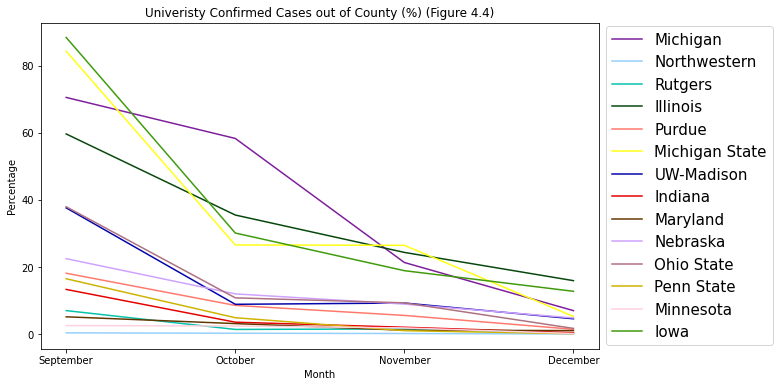

In [ ]:
confirmed_uni_out_of_county_plot = confirmed_uni_out_of_county_plot.rename(index={"confirmed_9": "September", "confirmed_10": "October", "confirmed_11": "November", "confirmed_12": "December"})
confirmed_uni_out_of_county_plot= confirmed_uni_out_of_county_plot.astype(float)
plt.figure(figsize=(10,6))
sns.set_palette(sns.color_palette(colors))
ax = sns.lineplot(data=confirmed_uni_out_of_county_plot, dashes=False,sort = False).set(title='Univeristy Confirmed Cases out of County (%) (Figure 4.4)', xlabel='Month', ylabel='Percentage')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

### 2.2 Consider Population

Since the population for universities and correlated counties might be a potential influence to the confirmed percentage, in order to determine whether the univerity performance compared to its county, we would like to divide the university confirmed case percentage out of county by the university population out of the county.


The dataset we use is created by ourselves. Some of the percentages are provided directly by the school on its website such as Universiyt of Michigan.

But for most of them, we directly seached the population of correlated county or counties and the population of university.

In [ ]:
uni_pop_out_of_county = 'https://raw.githubusercontent.com/Yinsight/StanfordOpenDatathon_Team244/main/uni_pop_out_of_county.csv'
uni_pop_out_of_county = pd.read_csv(uni_pop_out_of_county, encoding='unicode_escape', delimiter=',')
uni_pop_out_of_county

,ï»¿Country_Region,uni_population_out_of_county
0,Michigan,16.00%
1,Northwestern,0.43%
2,Rutgers,6.00%
3,Illinois,25.00%
4,Purdue,23.43%
5,Michigan State,17.00%
6,UW-Madison,8.33%
7,Indiana,29.00%
8,Maryland,4.89%
9,Nebraska,7.85%


In [ ]:
def pecent(x):
    return float(x.strip('%'))

In [ ]:
uni_pop_out_of_county.columns.values[0] = 'Country_Region'
uni_pop_out_of_county['uni_population_out_of_county'] = uni_pop_out_of_county['uni_population_out_of_county'].apply(lambda x: pecent(x))

In [ ]:
uni_pop_out_of_county_plot = confirmed_uni_out_of_county_plot/uni_pop_out_of_county.iloc[:,1].values
uni_pop_out_of_county_plot

Country_Region,Michigan,Northwestern,Rutgers,Illinois,Purdue,Michigan State,UW-Madison,Indiana,Maryland,Nebraska,Ohio State,Penn State,Minnesota,Iowa
September,4.407143,0.886639,1.168847,2.385399,0.774316,4.956785,4.515440,0.459320,1.055866,2.864053,7.354649,0.583798,0.681318,4.388255
October,3.643686,0.624805,0.233379,1.419355,0.365247,1.562987,1.067139,0.122743,0.642720,1.527196,2.094648,0.173141,0.641255,1.495616
November,1.333850,0.436177,0.258016,0.973849,0.238000,1.556431,1.112625,0.070789,0.239100,1.140288,1.806362,0.036679,0.490728,0.938710
December,0.437359,0.111394,0.044623,0.637269,0.061402,0.309370,0.549170,0.014895,0.215917,0.614334,0.330914,0.004547,0.049957,0.633532


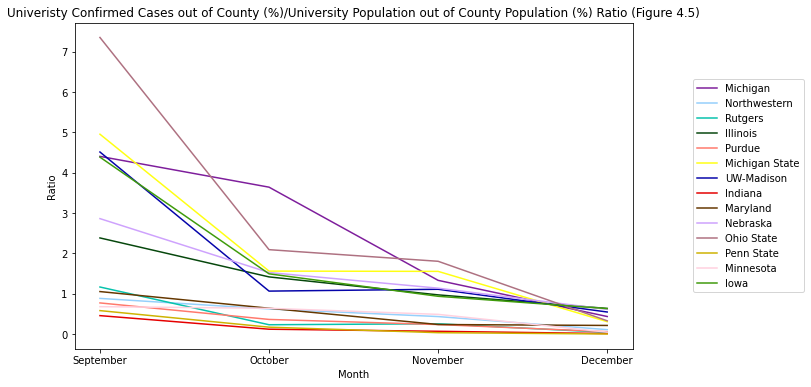

In [ ]:
uni_pop_out_of_county_plot = uni_pop_out_of_county_plot.rename(index={"confirmed_9": "September", "confirmed_10": "October", "confirmed_11": "November", "confirmed_12": "December"})
uni_pop_out_of_county_plot= uni_pop_out_of_county_plot.astype(float)
plt.figure(figsize=(10,6))
sns.set_palette(sns.color_palette(colors))
ax = sns.lineplot(data=uni_pop_out_of_county_plot, dashes=False,sort = False).set(title='Univeristy Confirmed Cases out of County (%)/University Population out of County Population (%) Ratio (Figure 4.5)', xlabel='Month', ylabel='Ratio')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

## 3. Modeling

In the modeling part, we use both statistical methods and machine learning models to analyze what features are important for receiving COVID-19 stimulus funding.

### Correlation

In [ ]:
# stimulus funding correlation
import pandas as pd 
stimulus_fund ="https://raw.githubusercontent.com/Yinsight/StanfordOpenDatathon_Team244/main/college-region.csv"
stimulus_fund_df = pd.read_csv(stimulus_fund, encoding= 'unicode_escape', delimiter = ",")
stimulus_fund_df = stimulus_fund_df.rename(columns={stimulus_fund_df.columns[0]: "Country_Region", stimulus_fund_df.columns[-1]: "stimulus_funding"})

In [ ]:
# merge with covid test and confirmed cases data
stimulus_fund_df = stimulus_fund_df.merge(test_diff).merge(confrimed_diff).merge(confrimed_percentage)
stimulus_fund_df

,Country_Region,county,state,enroll_16,enroll_17,enroll_18,enroll_19,enroll_20,international_18,international_19,international_20,stimulus_funding,test_8,test_9,test_10,test_11,test_12,confirmed_8,confirmed_9,confirmed_10,confirmed_11,confirmed_12,confimed/test_8,confimed/test_9,confimed/test_10,confimed/test_11,confimed/test_12
0,Michigan,Washtenaw,Michigan,44718.0,46002.0,46716.0,48090.0,48090.0,6984.0,7271.0,6984.0,36174408.0,7391.0,13174.0,23377.0,36392.0,12604.0,118.0,617.0,1131.0,929.0,186.0,1.596536,4.683467,4.838089,2.552759,1.475722
1,Northwestern,Cook,Illinois,16415.0,16675.0,22127.0,17156.0,22127.0,NaN,NaN,NaN,12775920.0,0.0,21626.0,22141.0,25661.0,4248.0,24.0,72.0,110.0,225.0,31.0,0.000000,0.332933,0.496816,0.876817,0.729755
2,Rutgers,Middlesex,New Jersey,50146.0,49577.0,50254.0,50173.0,50200.0,5879.0,6020.0,5923.0,83956947.0,12341.0,12830.0,16070.0,22011.0,3675.0,21.0,193.0,123.0,398.0,66.0,0.170164,1.504287,0.765401,1.808187,1.795918
3,Illinois,Champaign,Illinois,46951.0,48216.0,49702.0,51605.0,52331.0,10766.0,10809.0,9363.0,44619241.0,168817.0,262137.0,249183.0,224119.0,107955.0,1049.0,1405.0,627.0,1052.0,336.0,0.621383,0.535979,0.251622,0.469393,0.311241
4,Purdue,Tippecanoe,Indiana,41573.0,43411.0,44474.0,55311.0,45869.0,8936.0,9085.0,8158.0,33443017.0,7605.0,24239.0,25891.0,25651.0,3605.0,174.0,750.0,839.0,1595.0,261.0,2.287968,3.094187,3.240508,6.218081,7.239945
5,Michigan State,Ingham,Michigan,50340.0,50019.0,50351.0,49809.0,49695.0,6263.0,5643.0,4527.0,45964753.0,1758.0,3121.0,1793.0,5395.0,1386.0,573.0,1537.0,351.0,1106.0,143.0,32.593857,49.247036,19.576129,20.500463,10.317460
6,UW-Madison,Dane,Wisconsin,42582.0,42977.0,43463.0,44527.0,45537.0,6304.0,6456.0,6304.0,29783409.0,9711.0,36614.0,40721.0,44080.0,21051.0,124.0,1945.0,517.0,1098.0,207.0,1.276902,5.312176,1.269615,2.490926,0.983326
7,Indiana,Monroe,Indiana,49695.0,43710.0,43503.0,43260.0,43064.0,5622.0,5271.0,4353.0,35998136.0,21352.0,46076.0,47596.0,37817.0,12360.0,1441.0,1224.0,632.0,989.0,165.0,6.748782,2.656481,1.327843,2.615226,1.334951
8,Maryland,Prince George's,Maryland,39083.0,40521.0,41200.0,40743.0,40709.0,6483.0,6483.0,6806.0,32838845.0,11962.0,19319.0,13981.0,13884.0,12600.0,28.0,299.0,203.0,193.0,163.0,0.234075,1.547699,1.451971,1.390089,1.293651
9,Nebraska,Lancaster,Nebraska,25897.0,26079.0,25820.0,25930.0,25057.0,2807.0,2074.0,1526.0,23871084.0,1613.0,4154.0,5862.0,7372.0,2197.0,243.0,556.0,375.0,641.0,197.0,15.065096,13.384689,6.397134,8.695062,8.966773


In [ ]:
# to quantify the trend of enrollment, we define enrollment difference as the sum of differences between 2020 and all other years
stimulus_fund_df["enroll_diff"] = stimulus_fund_df["enroll_20"]*4 - (stimulus_fund_df["enroll_16"] + stimulus_fund_df["enroll_17"] + stimulus_fund_df["enroll_18"] + stimulus_fund_df["enroll_19"])
stimulus_fund_df["international_diff"] = stimulus_fund_df["international_20"]*2 - (stimulus_fund_df["international_18"] + stimulus_fund_df["international_19"])
stimulus_fund_df["total_test"] = stimulus_fund_df["test_8"] + stimulus_fund_df["test_9"] + stimulus_fund_df["test_10"] + stimulus_fund_df["test_11"] + stimulus_fund_df["test_12"]
stimulus_fund_df["total_confirmed"] = stimulus_fund_df["confirmed_8"] + stimulus_fund_df["confirmed_9"] + stimulus_fund_df["confirmed_10"] + stimulus_fund_df["confirmed_11"] + stimulus_fund_df["confirmed_12"]
stimulus_fund_df["percentage_sum"]  = stimulus_fund_df["confimed/test_8"] + stimulus_fund_df["confimed/test_9"] + stimulus_fund_df["confimed/test_10"] + stimulus_fund_df["confimed/test_11"] + stimulus_fund_df["confimed/test_12"]
stimulus_fund_df

,Country_Region,county,state,enroll_16,enroll_17,enroll_18,enroll_19,enroll_20,international_18,international_19,international_20,stimulus_funding,test_8,test_9,test_10,test_11,test_12,confirmed_8,confirmed_9,confirmed_10,confirmed_11,confirmed_12,confimed/test_8,confimed/test_9,confimed/test_10,confimed/test_11,confimed/test_12,enroll_diff,international_diff,total_test,total_confirmed,percentage_sum
0,Michigan,Washtenaw,Michigan,44718.0,46002.0,46716.0,48090.0,48090.0,6984.0,7271.0,6984.0,36174408.0,7391.0,13174.0,23377.0,36392.0,12604.0,118.0,617.0,1131.0,929.0,186.0,1.596536,4.683467,4.838089,2.552759,1.475722,6834.0,-287.0,92938.0,2981.0,15.146573
1,Northwestern,Cook,Illinois,16415.0,16675.0,22127.0,17156.0,22127.0,NaN,NaN,NaN,12775920.0,0.0,21626.0,22141.0,25661.0,4248.0,24.0,72.0,110.0,225.0,31.0,0.000000,0.332933,0.496816,0.876817,0.729755,16135.0,NaN,73676.0,462.0,2.436321
2,Rutgers,Middlesex,New Jersey,50146.0,49577.0,50254.0,50173.0,50200.0,5879.0,6020.0,5923.0,83956947.0,12341.0,12830.0,16070.0,22011.0,3675.0,21.0,193.0,123.0,398.0,66.0,0.170164,1.504287,0.765401,1.808187,1.795918,650.0,-53.0,66927.0,801.0,6.043958
3,Illinois,Champaign,Illinois,46951.0,48216.0,49702.0,51605.0,52331.0,10766.0,10809.0,9363.0,44619241.0,168817.0,262137.0,249183.0,224119.0,107955.0,1049.0,1405.0,627.0,1052.0,336.0,0.621383,0.535979,0.251622,0.469393,0.311241,12850.0,-2849.0,1012211.0,4469.0,2.189619
4,Purdue,Tippecanoe,Indiana,41573.0,43411.0,44474.0,55311.0,45869.0,8936.0,9085.0,8158.0,33443017.0,7605.0,24239.0,25891.0,25651.0,3605.0,174.0,750.0,839.0,1595.0,261.0,2.287968,3.094187,3.240508,6.218081,7.239945,-1293.0,-1705.0,86991.0,3619.0,22.080689
5,Michigan State,Ingham,Michigan,50340.0,50019.0,50351.0,49809.0,49695.0,6263.0,5643.0,4527.0,45964753.0,1758.0,3121.0,1793.0,5395.0,1386.0,573.0,1537.0,351.0,1106.0,143.0,32.593857,49.247036,19.576129,20.500463,10.317460,-1739.0,-2852.0,13453.0,3710.0,132.234946
6,UW-Madison,Dane,Wisconsin,42582.0,42977.0,43463.0,44527.0,45537.0,6304.0,6456.0,6304.0,29783409.0,9711.0,36614.0,40721.0,44080.0,21051.0,124.0,1945.0,517.0,1098.0,207.0,1.276902,5.312176,1.269615,2.490926,0.983326,8599.0,-152.0,152177.0,3891.0,11.332945
7,Indiana,Monroe,Indiana,49695.0,43710.0,43503.0,43260.0,43064.0,5622.0,5271.0,4353.0,35998136.0,21352.0,46076.0,47596.0,37817.0,12360.0,1441.0,1224.0,632.0,989.0,165.0,6.748782,2.656481,1.327843,2.615226,1.334951,-7912.0,-2187.0,165201.0,4451.0,14.683283
8,Maryland,Prince George's,Maryland,39083.0,40521.0,41200.0,40743.0,40709.0,6483.0,6483.0,6806.0,32838845.0,11962.0,19319.0,13981.0,13884.0,12600.0,28.0,299.0,203.0,193.0,163.0,0.234075,1.547699,1.451971,1.390089,1.293651,1289.0,646.0,71746.0,886.0,5.917484
9,Nebraska,Lancaster,Nebraska,25897.0,26079.0,25820.0,25930.0,25057.0,2807.0,2074.0,1526.0,23871084.0,1613.0,4154.0,5862.0,7372.0,2197.0,243.0,556.0,375.0,641.0,197.0,15.065096,13.384689,6.397134,8.695062,8.966773,-3498.0,-1829.0,21198.0,2012.0,52.508755


In [ ]:
# impute one missing value: international student enrollment of Northwestern according to the international student enrollment/total enrollment of its neareast neighbor (Nebraska)
avg_ratio = ((stimulus_fund_df.loc[stimulus_fund_df.index[9], 'enroll_18'] / stimulus_fund_df.loc[stimulus_fund_df.index[9], 'international_18']) + (stimulus_fund_df.loc[stimulus_fund_df.index[9], 'enroll_19'] / stimulus_fund_df.loc[stimulus_fund_df.index[9], 'international_19']) + (stimulus_fund_df.loc[stimulus_fund_df.index[9], 'enroll_20'] / stimulus_fund_df.loc[stimulus_fund_df.index[9], 'international_20']))/3
stimulus_fund_df.loc[stimulus_fund_df.index[1], 'international_18'] = stimulus_fund_df.loc[stimulus_fund_df.index[1], 'enroll_18'] / avg_ratio
stimulus_fund_df.loc[stimulus_fund_df.index[1], 'international_19'] = stimulus_fund_df.loc[stimulus_fund_df.index[1], 'enroll_19'] / avg_ratio
stimulus_fund_df.loc[stimulus_fund_df.index[1], 'international_20'] = stimulus_fund_df.loc[stimulus_fund_df.index[1], 'enroll_20'] / avg_ratio
stimulus_fund_df

,Country_Region,county,state,enroll_16,enroll_17,enroll_18,enroll_19,enroll_20,international_18,international_19,international_20,stimulus_funding,test_8,test_9,test_10,test_11,test_12,confirmed_8,confirmed_9,confirmed_10,confirmed_11,confirmed_12,confimed/test_8,confimed/test_9,confimed/test_10,confimed/test_11,confimed/test_12,enroll_diff,international_diff,total_test,total_confirmed,percentage_sum
0,Michigan,Washtenaw,Michigan,44718.0,46002.0,46716.0,48090.0,48090.0,6984.000000,7271.000000,6984.000000,36174408.0,7391.0,13174.0,23377.0,36392.0,12604.0,118.0,617.0,1131.0,929.0,186.0,1.596536,4.683467,4.838089,2.552759,1.475722,6834.0,-287.0,92938.0,2981.0,15.146573
1,Northwestern,Cook,Illinois,16415.0,16675.0,22127.0,17156.0,22127.0,1741.328443,1350.125673,1741.328443,12775920.0,0.0,21626.0,22141.0,25661.0,4248.0,24.0,72.0,110.0,225.0,31.0,0.000000,0.332933,0.496816,0.876817,0.729755,16135.0,NaN,73676.0,462.0,2.436321
2,Rutgers,Middlesex,New Jersey,50146.0,49577.0,50254.0,50173.0,50200.0,5879.000000,6020.000000,5923.000000,83956947.0,12341.0,12830.0,16070.0,22011.0,3675.0,21.0,193.0,123.0,398.0,66.0,0.170164,1.504287,0.765401,1.808187,1.795918,650.0,-53.0,66927.0,801.0,6.043958
3,Illinois,Champaign,Illinois,46951.0,48216.0,49702.0,51605.0,52331.0,10766.000000,10809.000000,9363.000000,44619241.0,168817.0,262137.0,249183.0,224119.0,107955.0,1049.0,1405.0,627.0,1052.0,336.0,0.621383,0.535979,0.251622,0.469393,0.311241,12850.0,-2849.0,1012211.0,4469.0,2.189619
4,Purdue,Tippecanoe,Indiana,41573.0,43411.0,44474.0,55311.0,45869.0,8936.000000,9085.000000,8158.000000,33443017.0,7605.0,24239.0,25891.0,25651.0,3605.0,174.0,750.0,839.0,1595.0,261.0,2.287968,3.094187,3.240508,6.218081,7.239945,-1293.0,-1705.0,86991.0,3619.0,22.080689
5,Michigan State,Ingham,Michigan,50340.0,50019.0,50351.0,49809.0,49695.0,6263.000000,5643.000000,4527.000000,45964753.0,1758.0,3121.0,1793.0,5395.0,1386.0,573.0,1537.0,351.0,1106.0,143.0,32.593857,49.247036,19.576129,20.500463,10.317460,-1739.0,-2852.0,13453.0,3710.0,132.234946
6,UW-Madison,Dane,Wisconsin,42582.0,42977.0,43463.0,44527.0,45537.0,6304.000000,6456.000000,6304.000000,29783409.0,9711.0,36614.0,40721.0,44080.0,21051.0,124.0,1945.0,517.0,1098.0,207.0,1.276902,5.312176,1.269615,2.490926,0.983326,8599.0,-152.0,152177.0,3891.0,11.332945
7,Indiana,Monroe,Indiana,49695.0,43710.0,43503.0,43260.0,43064.0,5622.000000,5271.000000,4353.000000,35998136.0,21352.0,46076.0,47596.0,37817.0,12360.0,1441.0,1224.0,632.0,989.0,165.0,6.748782,2.656481,1.327843,2.615226,1.334951,-7912.0,-2187.0,165201.0,4451.0,14.683283
8,Maryland,Prince George's,Maryland,39083.0,40521.0,41200.0,40743.0,40709.0,6483.000000,6483.000000,6806.000000,32838845.0,11962.0,19319.0,13981.0,13884.0,12600.0,28.0,299.0,203.0,193.0,163.0,0.234075,1.547699,1.451971,1.390089,1.293651,1289.0,646.0,71746.0,886.0,5.917484
9,Nebraska,Lancaster,Nebraska,25897.0,26079.0,25820.0,25930.0,25057.0,2807.000000,2074.000000,1526.000000,23871084.0,1613.0,4154.0,5862.0,7372.0,2197.0,243.0,556.0,375.0,641.0,197.0,15.065096,13.384689,6.397134,8.695062,8.966773,-3498.0,-1829.0,21198.0,2012.0,52.508755


In [ ]:
# compute correlation
pearson_corr = stimulus_fund_df[["stimulus_funding", "enroll_20", "enroll_diff", "international_20", "international_diff", "total_test", "total_confirmed", "percentage_sum"]].corr(method="pearson")
pearson_corr

,stimulus_funding,enroll_20,enroll_diff,international_20,international_diff,total_test,total_confirmed,percentage_sum
stimulus_funding,1.000000,0.648705,0.055413,0.427363,0.190713,0.104266,0.331495,0.032276
enroll_20,0.648705,1.000000,0.337486,0.682116,-0.023706,0.363790,0.568263,0.075005
enroll_diff,0.055413,0.337486,1.000000,0.151332,0.018489,0.435763,0.305790,-0.316299
international_20,0.427363,0.682116,0.151332,1.000000,0.290486,0.548592,0.352339,-0.181738
international_diff,0.190713,-0.023706,0.018489,0.290486,1.000000,-0.314370,-0.446998,-0.364875
total_test,0.104266,0.363790,0.435763,0.548592,-0.314370,1.000000,0.396188,-0.285444
total_confirmed,0.331495,0.568263,0.305790,0.352339,-0.446998,0.396188,1.000000,0.057256
percentage_sum,0.032276,0.075005,-0.316299,-0.181738,-0.364875,-0.285444,0.057256,1.000000


In [ ]:
spearman_corr = stimulus_fund_df[["stimulus_funding", "enroll_20", "enroll_diff", "international_20", "international_diff", "total_test", "total_confirmed", "percentage_sum"]].corr(method="spearman")
spearman_corr

,stimulus_funding,enroll_20,enroll_diff,international_20,international_diff,total_test,total_confirmed,percentage_sum
stimulus_funding,1.000000,0.859341,-0.032967,0.459341,-0.032967,0.265934,0.454945,0.270330
enroll_20,0.859341,1.000000,0.265934,0.542857,-0.148352,0.358242,0.450549,0.134066
enroll_diff,-0.032967,0.265934,1.000000,0.309890,0.208791,0.534066,0.054945,-0.441758
international_20,0.459341,0.542857,0.309890,1.000000,0.368132,0.512088,0.327473,-0.094505
international_diff,-0.032967,-0.148352,0.208791,0.368132,1.000000,0.010989,-0.483516,-0.142857
total_test,0.265934,0.358242,0.534066,0.512088,0.010989,1.000000,0.657143,-0.204396
total_confirmed,0.454945,0.450549,0.054945,0.327473,-0.483516,0.657143,1.000000,0.134066
percentage_sum,0.270330,0.134066,-0.441758,-0.094505,-0.142857,-0.204396,0.134066,1.000000


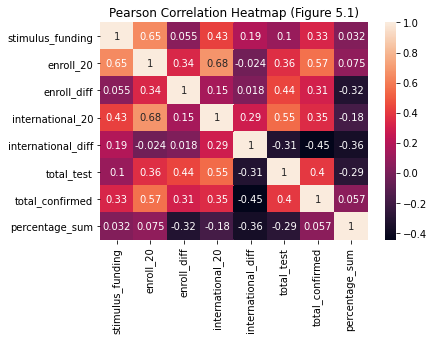

In [ ]:
import seaborn as sns
ax = sns.heatmap(pearson_corr, annot=True)
plt.title("Pearson Correlation Heatmap (Figure 5.1)")
plt.show()

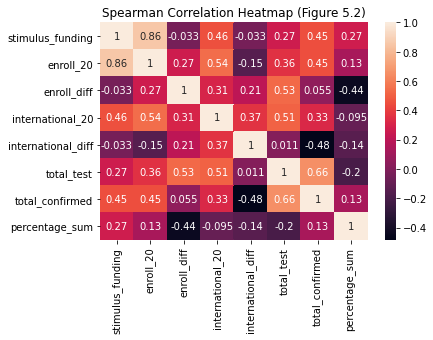

In [ ]:
import seaborn as sns
ax = sns.heatmap(spearman_corr, annot=True)
plt.title("Spearman Correlation Heatmap (Figure 5.2)")
plt.show()

### Machine Learning

In [ ]:
# separate features and target
X, y = stimulus_fund_ml.drop(columns=["stimulus_funding"]), stimulus_fund_ml["stimulus_funding"]

In [ ]:
# print features
X.columns

Index(['enroll_16', 'enroll_17', 'enroll_18', 'enroll_19', 'enroll_20',
       'international_18', 'international_19', 'international_20', 'test_8',
       'test_9', 'test_10', 'test_11', 'test_12', 'confirmed_8', 'confirmed_9',
       'confirmed_10', 'confirmed_11', 'confirmed_12', 'confimed/test_8',
       'confimed/test_9', 'confimed/test_10', 'confimed/test_11',
       'confimed/test_12', 'enroll_diff', 'international_diff', 'total_test',
       'total_confirmed', 'percentage_sum'],
      dtype='object')

In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
linear_regression_score = reg.coef_
linear_regression_score = pd.Series(linear_regression_score)
linear_regression_rank = linear_regression_score.rank(method='dense', ascending=True)

In [ ]:
# svm
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = make_pipeline(StandardScaler(), LinearSVR(C=1.0, epsilon=0.2))
regr.fit(X, y)
svm_score = regr[1].coef_
svm_score = pd.Series(svm_score)
svm_rank = svm_score.rank(method='dense', ascending=True)

In [ ]:
# xgboost
from xgboost import XGBRegressor
model = XGBRegressor(booster="gblinear", verbosity = 0)
model.fit(X, y)
xgboost_score = model.coef_
xgboost_score = pd.Series(xgboost_score)
xgboost_rank = xgboost_score.rank(method='dense', ascending=True)

In [ ]:
# put all feature importance scores into one dataframe
d = {'feature': X.columns, 'linear_regression_rank': linear_regression_rank, 'svm_rank': svm_rank, 'xgboost_rank': xgboost_rank}
feature_importance_rank = pd.DataFrame(data=d)
feature_importance_rank["rank_total"] = (feature_importance_rank["linear_regression_rank"] + feature_importance_rank["svm_rank"] + feature_importance_rank["xgboost_rank"])/3
feature_importance_rank

,feature,linear_regression_rank,svm_rank,xgboost_rank,rank_total
0,enroll_16,20.0,2.0,20.0,14.000000
1,enroll_17,4.0,22.0,19.0,15.000000
2,enroll_18,23.0,21.0,17.0,20.333333
3,enroll_19,24.0,1.0,13.0,12.666667
4,enroll_20,19.0,3.0,14.0,12.000000
5,international_18,2.0,3.0,11.0,5.333333
6,international_19,7.0,19.0,15.0,13.666667
7,international_20,22.0,14.0,18.0,18.000000
8,test_8,25.0,9.0,12.0,15.333333
9,test_9,11.0,8.0,9.0,9.333333


In [ ]:
feature_importance_rank.nsmallest(5, "rank_total")

,feature,linear_regression_rank,svm_rank,xgboost_rank,rank_total
5,international_18,2.0,3.0,11.0,5.333333
17,confirmed_12,8.0,5.0,3.0,5.333333
13,confirmed_8,3.0,13.0,5.0,7.000000
16,confirmed_11,5.0,14.0,4.0,7.666667
12,test_12,6.0,13.0,6.0,8.333333
